## Boston House Price Prediction

### Importing the libraries

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

### Exploratory Data Analysis

In [9]:
#loading dataset
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filepath_or_buffer='Datasets\housing.csv',delim_whitespace=True,names=name)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Boston House Price dataset has 14 features and their description is given as follows:

1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per dollar 10,000.
11. PTRATIO pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT % lower status of the population
14. MEDV Median value of owner-occupied homes in $1000's

Here main thing to notice is that MEDV is the outcome variable which we need to predict and all other variables are predictor variables.

In [11]:
#shape of our dataset
df.shape

(506, 14)

This data set has 14 features and 506 rows i.e. details of 506 houses.

In [12]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We can see that all features in the dataset are of numeric type either float or int.

In [13]:
#checking for missing data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no missing data.

### Correlation

<Axes: >

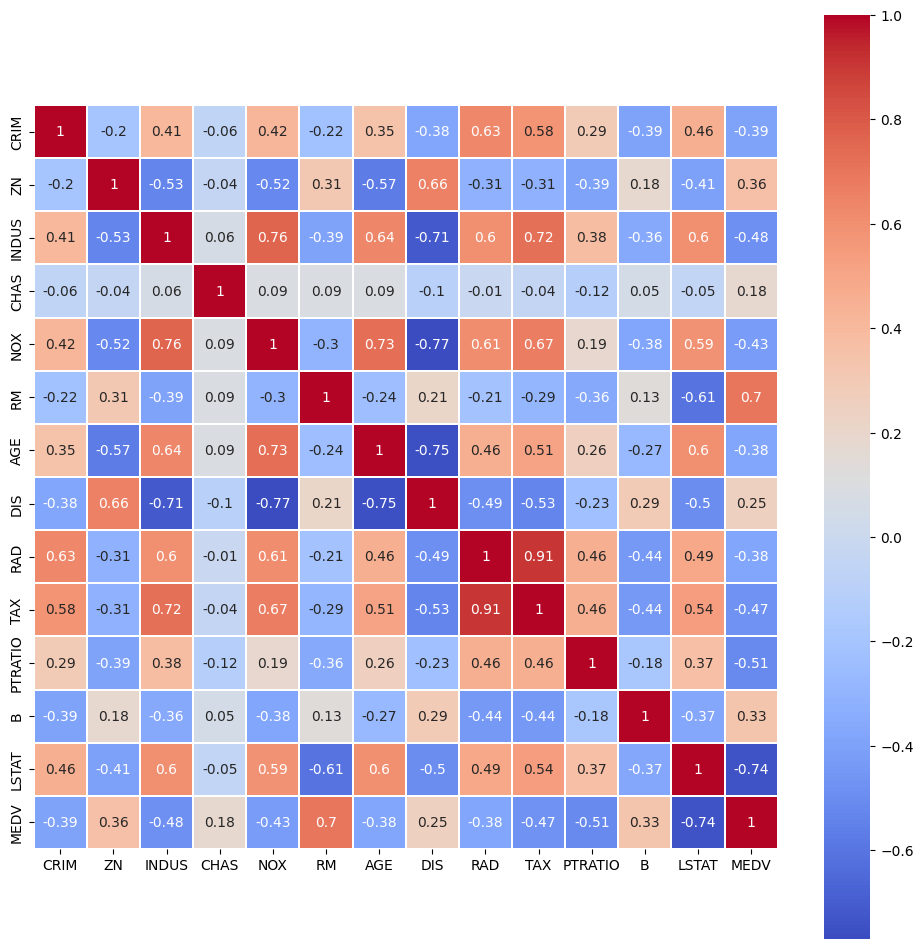

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

In [16]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296.0,15.3,4.98,24.0
1,6.421,242.0,17.8,9.14,21.6
2,7.185,242.0,17.8,4.03,34.7
3,6.998,222.0,18.7,2.94,33.4
4,7.147,222.0,18.7,5.33,36.2


We have created a new dataset consisting of only those variables which we selected after analysing the correlation heatmap.

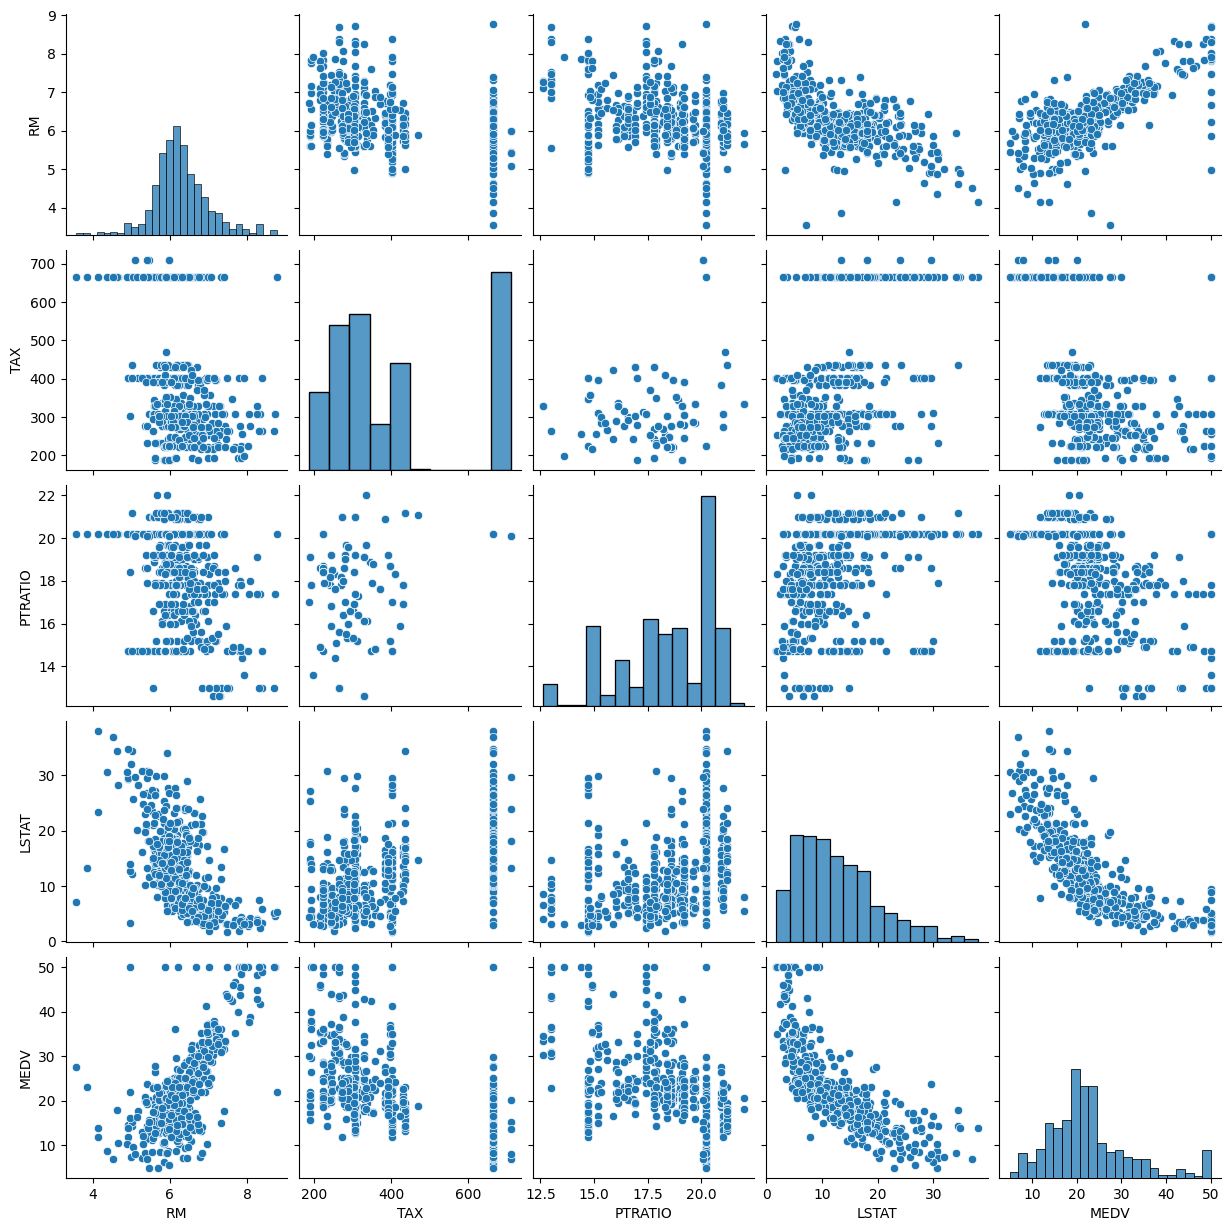

In [17]:
sns.pairplot(data=df1)

We can see that:

1. As we can see that RM, LSTAT and MEDV are normally distributed.

2. We can see that RM and LSTAT shows good linear relationship with MEDV.

3. There seems to have presence of some outliers in the dataset.

In [18]:
#description about data
desc = df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00
mean,6.28,408.24,18.46,12.65,22.53
std,0.70,168.54,2.16,7.14,9.20
min,3.56,187.00,12.60,1.73,5.00
25%,5.89,279.00,17.40,6.95,17.02
50%,6.21,330.00,19.05,11.36,21.20
75%,6.62,666.00,20.20,16.96,25.00
max,8.78,711.00,22.00,37.97,50.00


### Univariate and Multivariate Analysis

#### MEDV:

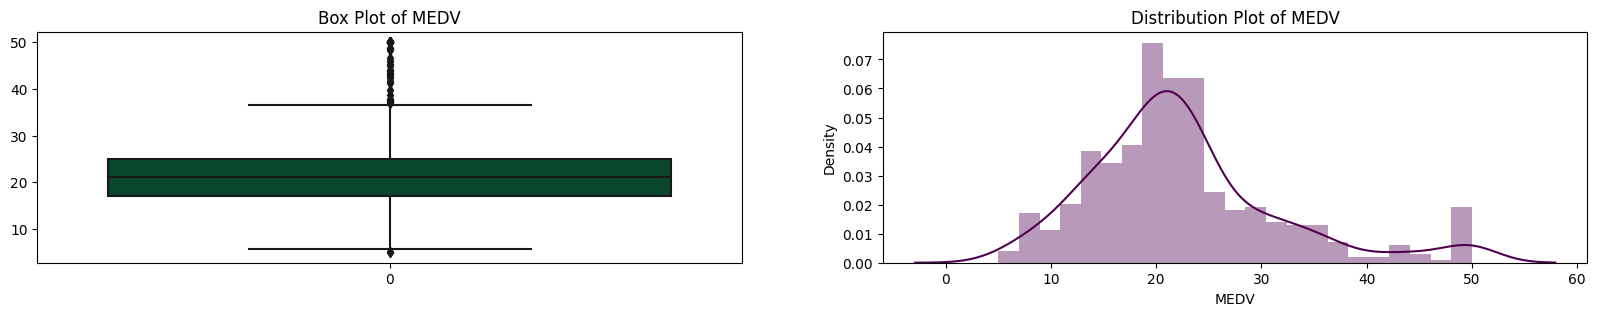

In [19]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df1.MEDV,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(a=df1.MEDV,color='#500050')
plt.title('Distribution Plot of MEDV')
plt.show()

From above two figures we can see observe that:

1. MEDV is normally distributed.
2. It contains some extreme values which could be potential outliers.

In [20]:
MEDV_Q3 = desc['MEDV']['75%']
MEDV_Q1 = desc['MEDV']['25%']
MEDV_IQR = MEDV_Q3 - MEDV_Q1
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR

df1[df1['MEDV']<MEDV_LV]

,RM,TAX,PTRATIO,LSTAT,MEDV
398,5.453,666.0,20.2,30.59,5.0
405,5.683,666.0,20.2,22.98,5.0


Since both TAX and LSTAT are negatively correlated to MEDV which means higher the TAX and LSTAT lower will be the house price and vica-versa.

In [21]:
df1[df1['MEDV']>MEDV_UV].sort_values(by=['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398.0,15.2,5.10,37.0
179,6.980,193.0,17.8,5.04,37.2
291,7.148,245.0,19.2,3.56,37.3
226,8.040,307.0,17.4,3.13,37.6
182,7.155,193.0,17.8,4.82,37.9
97,8.069,276.0,18.0,4.21,38.7
180,7.765,193.0,17.8,7.56,39.8
157,6.943,403.0,14.7,4.59,41.3
232,8.337,307.0,17.4,2.47,41.7
202,7.610,348.0,14.7,3.11,42.3


For house prices = 50, it is observed that number of Room ranges from 5 to 9 (approx.) which is quite unusual.

1. Also for these houses TAX ranges from low to high.
2. For houses price between 37 to less than 50, RM is higher than 75% of the total data points. Since RM is positively correlated to MEDV, this could be reason for little higher house prices.
3. Also for these houses PTRATIO and LSTAT lies in 25% - 50% of the total observation respectively. Since PTRATIO and LSAT are negatively correlated to MEDV, this could be reason for little higher house prices.

In [22]:
print(f'Shape of dataset before remving Outliers: {df1.shape}')
df2 = df1[~(df1['MEDV']==50)]
print(f'Shape of dataset after remving Outliers: {df2.shape}')

Shape of dataset before remving Outliers: (506, 5)
Shape of dataset after remving Outliers: (490, 5)


#### Tax

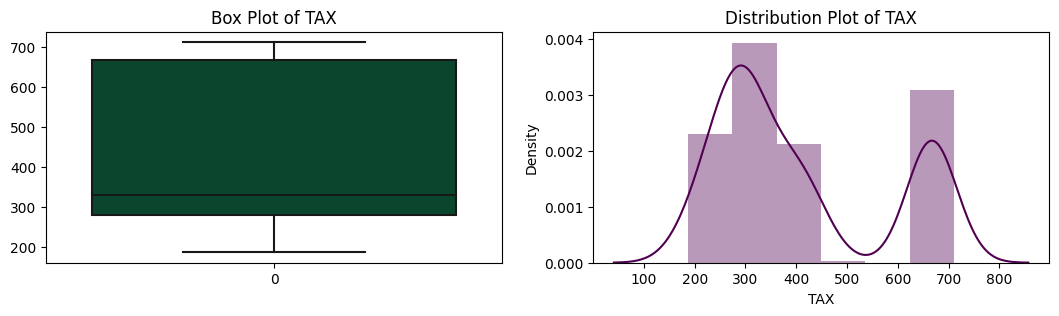

In [26]:
#Box Plot, Distribution Plot and Scatter Plot for TAX
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.TAX,color='#005030')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX')

plt.show()

In [27]:
temp_df = df2[df1['TAX']>600].sort_values(by=['RM','MEDV'])
temp_df.shape

(132, 5)

In [28]:
temp_df

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,666.0,20.2,7.12,27.5
367,3.863,666.0,20.2,13.33,23.1
406,4.138,666.0,20.2,23.34,11.9
374,4.138,666.0,20.2,37.97,13.8
384,4.368,666.0,20.2,30.63,8.8
...,...,...,...,...,...
473,6.980,666.0,20.2,11.66,29.8
482,7.061,666.0,20.2,7.01,25.0
375,7.313,666.0,20.2,13.44,15.0
453,7.393,666.0,20.2,16.74,17.8


In [29]:
temp_df.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.000689,667.704545,20.196212,19.167045,14.994697
std,0.712621,8.623365,0.019163,6.483094,5.405825
min,3.561000,666.000000,20.100000,5.290000,5.000000
25%,5.674250,666.000000,20.200000,14.647500,10.900000
50%,6.139500,666.000000,20.200000,18.100000,14.100000
75%,6.407250,666.000000,20.200000,23.275000,19.200000
max,8.780000,711.000000,20.200000,37.970000,29.800000


1. RM for these entries lies between 3.5 to 8.78.
2. PTRATIO for almost all of these entries is same and equal to 20.20.
3. LSTAT for these entries lies between 2.96 to 37.97.
4. MEDV for these entries lies between 5 to 29.80.

All these observations are very unusual, it seems impossible to have such high TAX values for all these houses.

In [30]:
TAX_10 = df2[(df2['TAX']<600) & (df2['LSTAT']>=0) & (df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = df2[(df2['TAX']<600) & (df2['LSTAT']>=10) & (df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = df2[(df2['TAX']<600) & (df2['LSTAT']>=20) & (df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = df2[(df2['TAX']<600) & (df2['LSTAT']>=30)]['TAX'].mean()

indexes = list(df2.index)
for i in indexes:
    if df2['TAX'][i] > 600:
        if (0 <= df2['LSTAT'][i] < 10):
            df2.at[i,'TAX'] = TAX_10
        elif (10 <= df2['LSTAT'][i] < 20):
            df2.at[i,'TAX'] = TAX_20
        elif (20 <= df2['LSTAT'][i] < 30):
            df2.at[i,'TAX'] = TAX_30
        elif (df2['LSTAT'][i] >30):
            df2.at[i,'TAX'] = TAX_40

print('Values imputed successfully')

Values imputed successfully


In [31]:
#This show all those extreme TAX values are replaced successfully
df2[df2['TAX']>600]['TAX'].count()

0

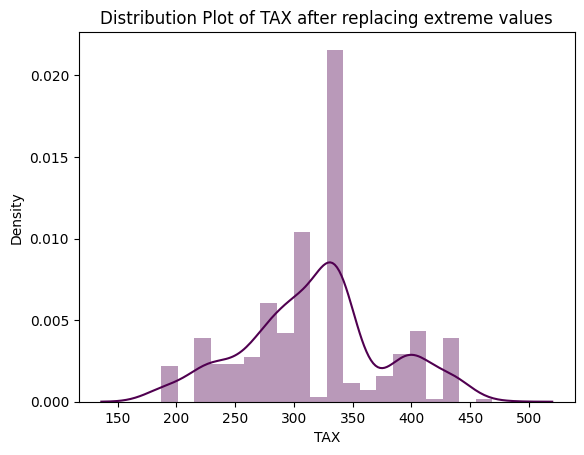

In [32]:
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

#### PTRATIO

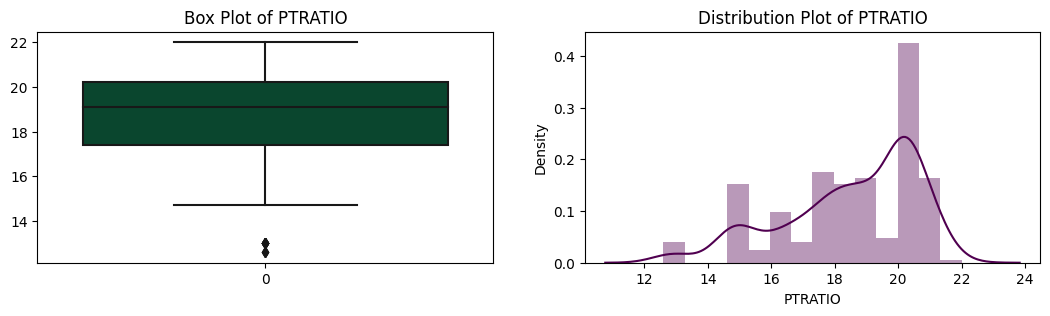

In [34]:
#Box Plot, Distribution Plot and Scatter Plot for PTRATIO
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=df2.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.show()

In [35]:
df2[df2['PTRATIO']<14].sort_values(by=['LSTAT','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
268,7.470,264.0,13.0,3.16,43.5
196,7.287,329.0,12.6,4.08,33.3
262,8.398,264.0,13.0,5.91,48.8
198,7.274,329.0,12.6,6.62,34.6
259,6.842,264.0,13.0,6.90,30.1
261,7.520,264.0,13.0,7.26,43.1
258,7.333,264.0,13.0,7.79,36.0
264,7.206,264.0,13.0,8.10,36.5
197,7.107,329.0,12.6,8.61,30.3
260,7.203,264.0,13.0,9.59,33.8


#### LSTAT

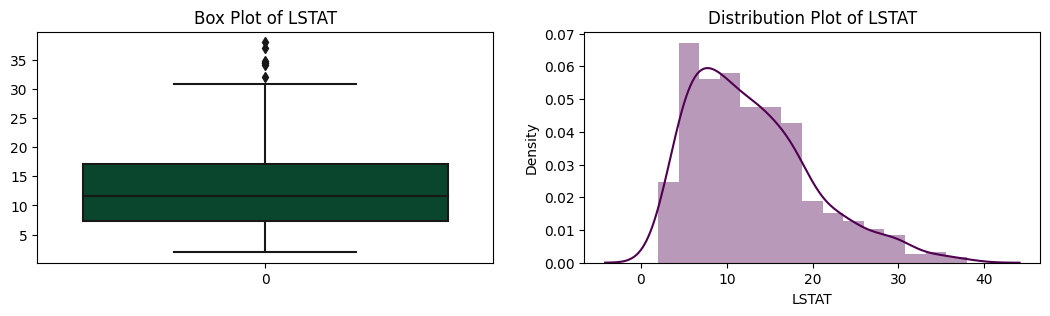

In [36]:
#Box Plot, Distribution Plot and Scatter Plot for LSTAT
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=df2.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.show()

In [37]:
LSTAT_Q3 = desc['LSTAT']['75%']
LSTAT_Q1 = desc['LSTAT']['25%']
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

df2[df2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

,RM,TAX,PTRATIO,LSTAT,MEDV
387,5.000,335.0,20.2,31.99,7.4
438,5.935,335.0,20.2,34.02,8.4
412,4.628,335.0,20.2,34.37,17.9
141,5.019,437.0,21.2,34.41,14.4
373,4.906,335.0,20.2,34.77,13.8
414,4.519,335.0,20.2,36.98,7.0
374,4.138,335.0,20.2,37.97,13.8


#### RM

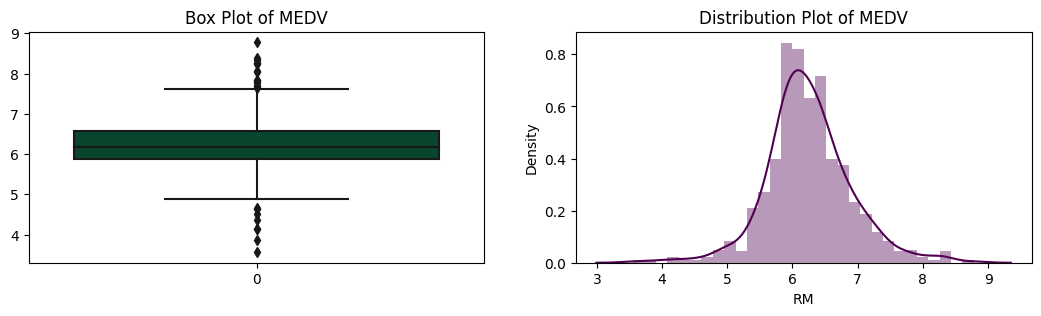

In [38]:
#Box Plot, Distribution Plot and Scatter Plot for RM
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.RM,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,3,2)
sns.distplot(a=df2.RM,color='#500050')
plt.title('Distribution Plot of MEDV')

plt.show()

In [39]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

df2[df2['RM']<RM_LV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,293.914141,20.2,7.12,27.5
367,3.863,334.330882,20.2,13.33,23.1
406,4.138,338.636364,20.2,23.34,11.9
374,4.138,335.000000,20.2,37.97,13.8
384,4.368,335.000000,20.2,30.63,8.8
414,4.519,335.000000,20.2,36.98,7.0
412,4.628,335.000000,20.2,34.37,17.9
386,4.652,338.636364,20.2,28.28,10.5


In [40]:
print(f'Shape of dataset before removing data points: {df2.shape}')
df3 = df2.drop(axis=0,index=[365,367])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (490, 5)
Shape of dataset before removing data points: (488, 5)


In [41]:
df3[df3['RM']>RM_UV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
180,7.765,193.000000,17.8,7.56,39.8
98,7.820,276.000000,18.0,3.57,43.8
280,7.820,216.000000,14.9,3.76,45.4
203,7.853,224.000000,14.7,3.81,48.5
226,8.040,307.000000,17.4,3.13,37.6
97,8.069,276.000000,18.0,4.21,38.7
233,8.247,307.000000,17.4,3.95,48.3
253,8.259,330.000000,19.1,3.54,42.8
224,8.266,307.000000,17.4,4.14,44.8
232,8.337,307.000000,17.4,2.47,41.7


In [42]:
print(f'Shape of dataset before removing data points: {df3.shape}')
df3 = df3.drop(axis=0,index=[364])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (488, 5)
Shape of dataset before removing data points: (487, 5)


### Splitting Dataset into Train and Test Set

In [43]:
#We will split our dataset into Dependent variable and Independent variable

X = df3.iloc[:,0:4].values
y = df3.iloc[:,-1:].values

X contains all independent variables

y contains independent variable MEDV

In [44]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (487, 4)
Shape of Independent Variable y = (487, 1)


In [45]:
def FeatureScaling(X):
    """
    is function takes an array as an input, which needs to be scaled down.
    Apply Standardization technique to it and scale down the features with mean = 0 and standard deviation = 1
    
    Input <- 2 dimensional numpy array
    Returns -> Numpy array after applying Feature Scaling
    """
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i]-mean[i])/std[i]

    return X

In [46]:
X = FeatureScaling(X)

In [47]:
m,n = X.shape
X = np.append(arr=np.ones((m,1)),values=X,axis=1)

We need to add a variable for Bias. So, we are adding a new column of 1's in X as the fist column.

In [48]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (389, 5)
Shape of X_test = (98, 5)
Shape of y_train = (389, 1)
Shape of y_test = (98, 1)


### Random Forest

In [49]:
X_rf = df3.iloc[:,:-1].values
y_rf = df3.iloc[:,-1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X_rf,y_rf,test_size=0.2,random_state=42)

print(f"Shape of X_train_rf = {X_train_rf.shape}")
print(f"Shape of X_test_rf = {X_test_rf.shape}")
print(f"Shape of y_train_rf = {y_train_rf.shape}")
print(f"Shape of y_test_rf = {y_test_rf.shape}")

Shape of X_train_rf = (389, 4)
Shape of X_test_rf = (98, 4)
Shape of y_train_rf = (389,)
Shape of y_test_rf = (98,)


In [51]:
warnings.filterwarnings(action='ignore')
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_rf,y_train_rf)

RandomForestRegressor(random_state=42)

In [52]:
y_pred_rf = rf.predict(X_test_rf)
y_pred_rf[:5]

array([22.656, 30.798, 20.115, 20.541, 15.175])

### Model Interpretation

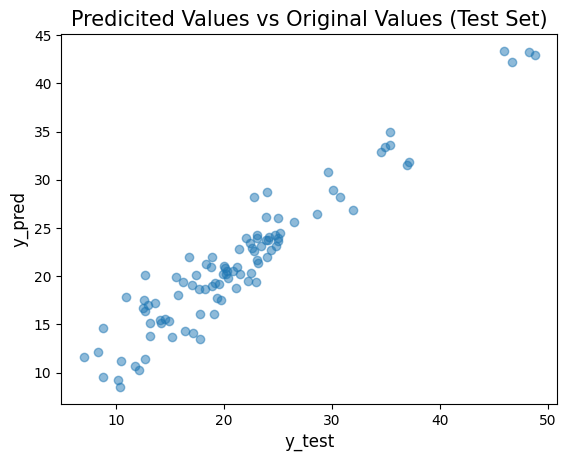

In [53]:
plt.scatter(x=y_test_rf,y=y_pred_rf,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

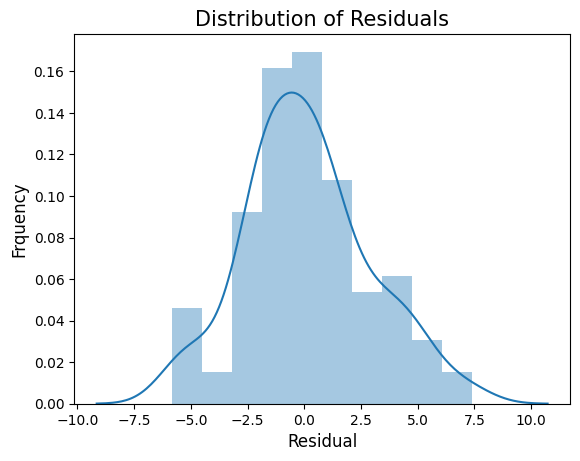

In [55]:
sns.distplot(y_pred_rf-y_test_rf)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

In [57]:
from sklearn import metrics
mse_rf = metrics.mean_squared_error(y_test_rf,y_pred_rf)
mae_rf = metrics.mean_absolute_error(y_test_rf,y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_rf,y_pred_rf))
print(f'Mean Squared Error: {mse_rf}',f'Mean Absolute Error: {mae_rf}',f'Root Mean Squared Error: {rmse_rf}',sep='\n')

Mean Squared Error: 7.575551642857144
Mean Absolute Error: 2.1395612244897957
Root Mean Squared Error: 2.752372002992536


From above Evaluation Metrices, we can notice that Root Mean Squared Error is low for our Random Forest Model and that is good thing for us.